In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings


In [3]:
df = pd.read_csv("fire_ca.csv")


In [4]:
df.head(10)

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month,temperature_c,wind_speed_kmph,humidity_percent,drought_index,land_cover
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6,36.712749,5.879102,12.542331,578.490140,Shrubland
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10,33.472979,7.437356,7.394505,643.035299,Forest
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2,26.391034,19.420294,17.085605,583.070356,Urban Fringe
3,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2,34.711554,11.579609,22.625307,550.367872,Urban Fringe
4,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7,32.415421,10.866671,13.012764,591.351213,Urban Fringe
5,32.5006,-114.7917,2013-02-06,Terra,MODIS,45.0,0,296.4,74,2013,2,36.625496,15.265750,22.828378,553.500652,Grassland
6,32.5025,-114.8179,2004-09-24,Terra,MODIS,37.6,0,316.4,77,2004,9,26.547745,27.297816,13.513905,482.220520,Forest
7,32.5044,-114.8044,2002-08-15,Terra,MODIS,13.2,0,315.7,67,2002,8,35.267098,15.527147,20.791586,469.915149,Urban Fringe
8,32.5075,-114.7997,2018-08-14,Terra,MODIS,20.5,0,309.9,69,2018,8,25.688669,23.372379,16.716755,657.875909,Forest
9,32.5121,-114.7494,2009-07-08,Aqua,MODIS,322.8,0,316.5,90,2009,7,31.731346,16.929522,21.690292,528.678953,Shrubland


In [5]:
df.shape

(221183, 16)

In [6]:
df.columns

Index(['latitude', 'longitude', 'acq_date', 'satellite', 'instrument', 'frp',
       'type', 'bright_t31', 'confidence', 'year', 'month', 'temperature_c',
       'wind_speed_kmph', 'humidity_percent', 'drought_index', 'land_cover'],
      dtype='object')

In [7]:
df.describe()

,latitude,longitude,frp,type,bright_t31,confidence,year,month,temperature_c,wind_speed_kmph,humidity_percent,drought_index
count,221183.000000,221183.000000,221183.000000,221183.000000,221183.000000,221183.000000,221183.000000,221183.000000,221183.000000,221183.000000,221183.000000,221183.000000
mean,38.218017,-120.263418,137.750609,0.010991,299.375297,83.162490,2012.581812,7.933978,32.500979,17.481245,14.996458,499.402621
std,2.536727,2.395738,353.842116,0.150897,12.301854,16.044658,6.056995,2.117886,4.326750,7.218817,5.777993,115.410182
min,32.464600,-123.999700,0.000000,0.000000,265.300000,50.000000,2000.000000,1.000000,25.000133,5.000017,5.000001,300.002479
25%,36.280050,-122.345450,19.900000,0.000000,291.500000,70.000000,2007.000000,7.000000,28.747332,11.227888,9.990127,399.492668
50%,38.660300,-120.495900,43.100000,0.000000,297.600000,86.000000,2013.000000,8.000000,32.508399,17.464977,14.991238,498.913230
75%,40.319500,-118.776300,110.100000,0.000000,305.600000,100.000000,2018.000000,9.000000,36.244533,23.722788,20.013928,599.100472
max,41.999900,-114.000100,11944.200000,3.000000,400.100000,100.000000,2020.000000,12.000000,39.999819,29.999773,24.999982,699.995750


In [8]:
df.isnull().sum()

latitude            0
longitude           0
acq_date            0
satellite           0
instrument          0
frp                 0
type                0
bright_t31          0
confidence          0
year                0
month               0
temperature_c       0
wind_speed_kmph     0
humidity_percent    0
drought_index       0
land_cover          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# cyclic encoding for months. 

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df.drop('month', axis=1, inplace=True)


In [11]:
#creating fire severity form frp to predict where the fire will be severe or not 


In [12]:
conditions = [
    (df['frp'] < 30),
    (df['frp'] >= 30) & (df['frp'] < 80),
    (df['frp'] >= 80)
]

choices = ['Low', 'Moderate', 'High']

df['fire_severity'] = np.select(conditions, choices, default='Low')

print("fire_severity value counts:")
print(df['fire_severity'].value_counts())


fire_severity value counts:
fire_severity
Low         84433
High        71486
Moderate    65264
Name: count, dtype: int64


<Axes: title={'center': 'Fire Severity Distribution'}, xlabel='fire_severity'>

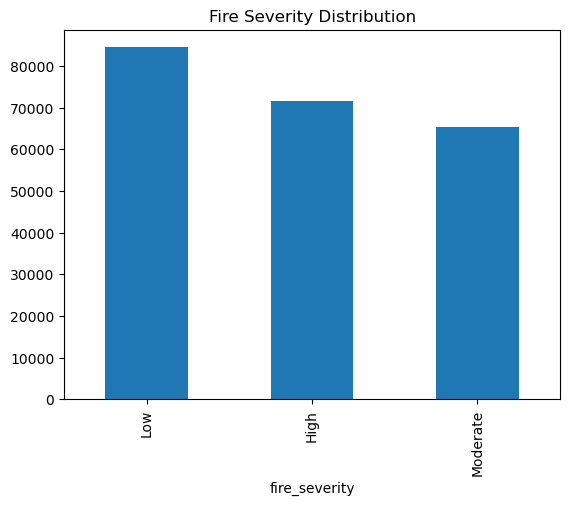

In [13]:
# distribution of fire severity
df['fire_severity'].value_counts().plot(kind='bar', title='Fire Severity Distribution')


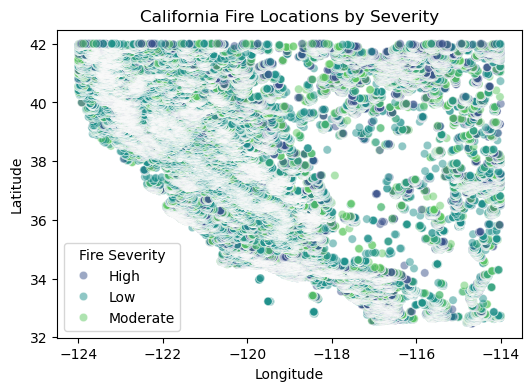

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='fire_severity', 
    palette='viridis',
    alpha=0.5
)
plt.title('California Fire Locations by Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fire Severity')
plt.show()



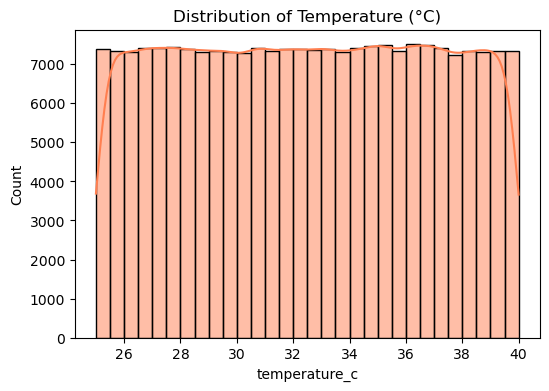

In [15]:
# distribution of temperature

plt.figure(figsize=(6,4))
sns.histplot(df['temperature_c'], kde=True, bins=30, color='coral')
plt.title('Distribution of Temperature (°C)')
plt.show()


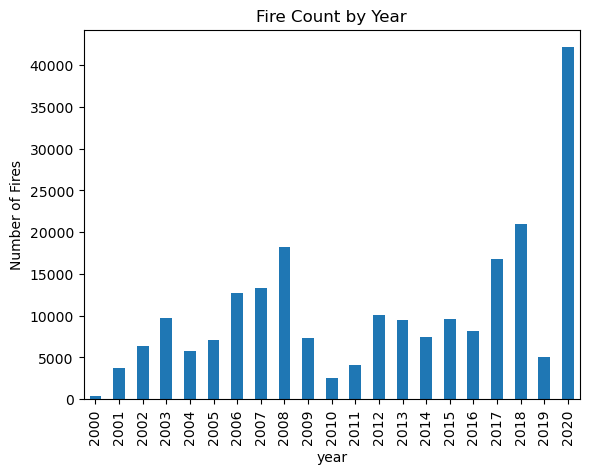

In [16]:
df.groupby('year')['fire_severity'].count().plot(kind='bar')
plt.title('Fire Count by Year')
plt.ylabel('Number of Fires')
plt.show()


In [17]:

numerical_cols=[
    'latitude', 'longitude', 'year',
    'temperature_c', 'wind_speed_kmph', 'humidity_percent',
    'drought_index', 'bright_t31'
]
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Selecting values outside the IQR bounds 
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"Column '{col}' has {len(outliers)} outliers")


Column 'latitude' has 0 outliers
Column 'longitude' has 0 outliers
Column 'year' has 0 outliers
Column 'temperature_c' has 0 outliers
Column 'wind_speed_kmph' has 0 outliers
Column 'humidity_percent' has 0 outliers
Column 'drought_index' has 0 outliers
Column 'bright_t31' has 4348 outliers


In [18]:
Q1 = df["bright_t31"].quantile(0.25)
Q3 = df["bright_t31"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


In [19]:
df["bright_t31"] = np.where(
    df["bright_t31"] < lower_limit, lower_limit,
    np.where(
        df["bright_t31"] > upper_limit, upper_limit,
        df["bright_t31"]
    )
)


In [20]:
# Count remaining outliers
remaining_outliers = df[(df["bright_t31"] < lower_limit) | (df["bright_t31"] > upper_limit)]

print("Remaining outliers in 'bright_t31':", len(remaining_outliers))

Remaining outliers in 'bright_t31': 0


In [21]:
# encoding categorical columns as label encoder
categorical_cols = ['satellite', 'instrument', 'type', 'confidence', 'land_cover']

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
    

In [22]:
# Encode the target
le_target = LabelEncoder()
df['fire_severity_encoded'] = le_target.fit_transform(df['fire_severity'])
print("Target classes:", le_target.classes_)


Target classes: ['High' 'Low' 'Moderate']


In [23]:
# Choose features (excluding frp to avoid leakage)
feature_cols = [
    'latitude', 'longitude', 'year',
    'temperature_c', 'wind_speed_kmph', 'humidity_percent',
    'drought_index', 'satellite', 'instrument',
    'type', 'confidence', 'land_cover', 'bright_t31'
]

In [24]:
X = df[feature_cols].copy()
y = df['fire_severity_encoded']


In [25]:
# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [26]:
# total length of training and testing 
print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 176946
Test size: 44237


In [27]:
# 7. Scale Numerical Features
numerical_cols = [
    'latitude', 'longitude', 'year',
    'temperature_c', 'wind_speed_kmph', 'humidity_percent',
    'drought_index', 'bright_t31'
]

In [28]:
scaler = StandardScaler()

In [29]:
#Fit scaler on train only
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform test
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [30]:
# 9. Training  Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le_target.classes_))


Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.76      0.69      0.72     14297
         Low       0.68      0.85      0.76     16887
    Moderate       0.54      0.42      0.47     13053

    accuracy                           0.67     44237
   macro avg       0.66      0.65      0.65     44237
weighted avg       0.66      0.67      0.66     44237



In [34]:
import time
print('Random forest serial trainning' )
rf_serial = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=42)

start_time = time.time()
rf_serial.fit(X_train, y_train)
end_time = time.time()

y_pred_serial = rf_serial.predict(X_test)
print(classification_report(y_test, y_pred_serial, target_names=le_target.classes_))
print(f"Training Time (Serial): {round(end_time - start_time, 2)} seconds")



Random forest serial trainning
              precision    recall  f1-score   support

        High       0.76      0.69      0.72     14297
         Low       0.68      0.85      0.76     16887
    Moderate       0.54      0.42      0.47     13053

    accuracy                           0.67     44237
   macro avg       0.66      0.65      0.65     44237
weighted avg       0.66      0.67      0.66     44237

Training Time (Serial): 37.03 seconds


In [35]:
print(" Random forest parallel trainning  ")
rf_parallel = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

start_time = time.time()
rf_parallel.fit(X_train, y_train)
end_time = time.time()

y_pred_parallel = rf_parallel.predict(X_test)
print(classification_report(y_test, y_pred_parallel, target_names=le_target.classes_))
print(f"Training Time (Parallel): {round(end_time - start_time, 2)} seconds")


 Random forest parallel trainning  
              precision    recall  f1-score   support

        High       0.76      0.69      0.72     14297
         Low       0.68      0.85      0.76     16887
    Moderate       0.54      0.42      0.47     13053

    accuracy                           0.67     44237
   macro avg       0.66      0.65      0.65     44237
weighted avg       0.66      0.67      0.66     44237

Training Time (Parallel): 7.77 seconds


In [36]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# SERIAL
start_serial = time.time()

logreg_serial = LogisticRegression(
    solver='saga',
    multi_class='multinomial',
    max_iter=1000,
    n_jobs=1,
    random_state=42
)
logreg_serial.fit(X_train, y_train)

end_serial = time.time()

y_pred_serial = logreg_serial.predict(X_test)

print("\n Logistic Regression Serial Classification Report:")
print(classification_report(y_test, y_pred_serial, target_names=le_target.classes_))
print("Serial training time:", round(end_serial - start_serial, 2), "sec")



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



 Logistic Regression Serial Classification Report:
              precision    recall  f1-score   support

        High       0.61      0.79      0.69     14297
         Low       0.68      0.77      0.72     16887
    Moderate       0.43      0.22      0.29     13053

    accuracy                           0.61     44237
   macro avg       0.57      0.59      0.57     44237
weighted avg       0.58      0.61      0.58     44237

Serial training time: 1.42 sec


In [37]:
# PARALLEL processing 
start_parallel = time.time()

logreg_parallel = LogisticRegression(
    solver='saga',
    multi_class='multinomial',
    max_iter=1000,
    n_jobs=-1,
    random_state=42
)
logreg_parallel.fit(X_train, y_train)

end_parallel = time.time()

y_pred_parallel = logreg_parallel.predict(X_test)

print("\nLogistic Regression PARALLEL Classification Report:")
print(classification_report(y_test, y_pred_parallel, target_names=le_target.classes_))
print("Parallel training time:", round(end_parallel - start_parallel, 2), "sec")



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression PARALLEL Classification Report:
              precision    recall  f1-score   support

        High       0.61      0.79      0.69     14297
         Low       0.68      0.77      0.72     16887
    Moderate       0.43      0.22      0.29     13053

    accuracy                           0.61     44237
   macro avg       0.57      0.59      0.57     44237
weighted avg       0.58      0.61      0.58     44237

Parallel training time: 1.54 sec


In [39]:
# Generate random training type
import random
def check_training_type():
    return random.choices(["Parallel Training", "Sequential Training"])
print("Training Type:", check_training_type())

Training Type: ['Parallel Training']


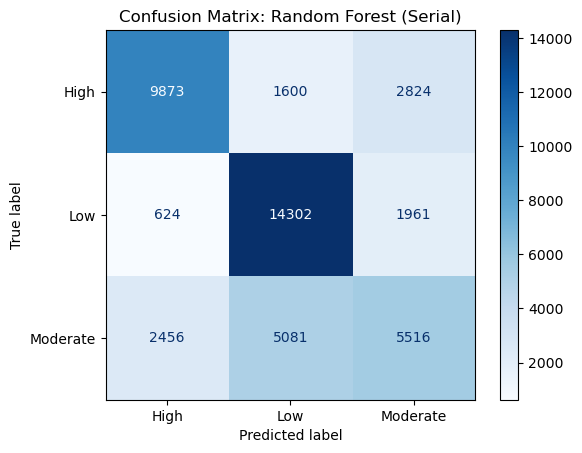

<Figure size 400x400 with 0 Axes>

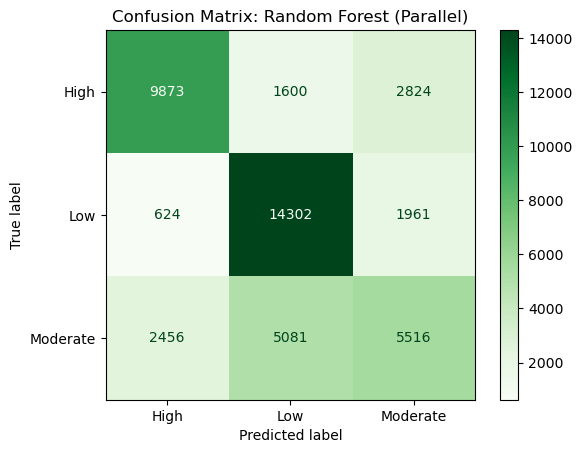

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Random Forest Serial
cm_rf_serial = confusion_matrix(y_test, y_pred_rf)
disp_rf_serial = ConfusionMatrixDisplay(confusion_matrix=cm_rf_serial, display_labels=class_labels)
disp_rf_serial.plot(cmap='Blues')
plt.title("Confusion Matrix: Random Forest (Serial)")
plt.figure(figsize=(4,4))
plt.show()

# Random Forest Parallel
cm_rf_parallel = confusion_matrix(y_test, y_pred_rf)
disp_rf_parallel = ConfusionMatrixDisplay(confusion_matrix=cm_rf_parallel, display_labels=class_labels)
disp_rf_parallel.plot(cmap='Greens')
plt.title("Confusion Matrix: Random Forest (Parallel)")
plt.show()



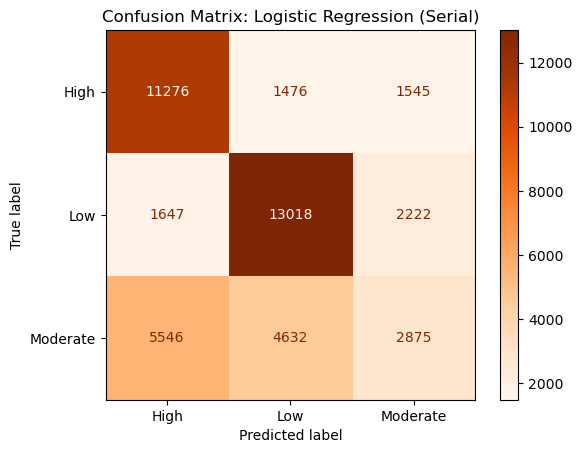

<Figure size 400x400 with 0 Axes>

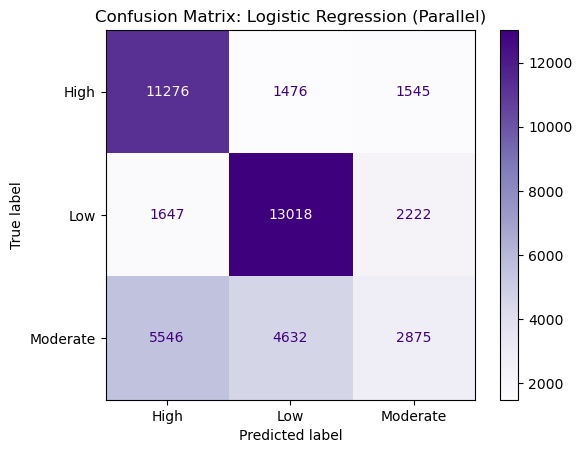

<Figure size 400x400 with 0 Axes>

In [49]:
# Logistic Regression Serial
cm_lr_serial = confusion_matrix(y_test, y_pred_serial)
disp_lr_serial = ConfusionMatrixDisplay(confusion_matrix=cm_lr_serial, display_labels=class_labels)
disp_lr_serial.plot(cmap='Oranges')
plt.title("Confusion Matrix: Logistic Regression (Serial)")
plt.figure(figsize=(4,4))
plt.show()

# Logistic Regression Parallel
cm_lr_parallel = confusion_matrix(y_test, y_pred_parallel)
disp_lr_parallel = ConfusionMatrixDisplay(confusion_matrix=cm_lr_parallel, display_labels=class_labels)
disp_lr_parallel.plot(cmap='Purples')
plt.title("Confusion Matrix: Logistic Regression (Parallel)")
plt.figure(figsize=(4,4))
plt.show()


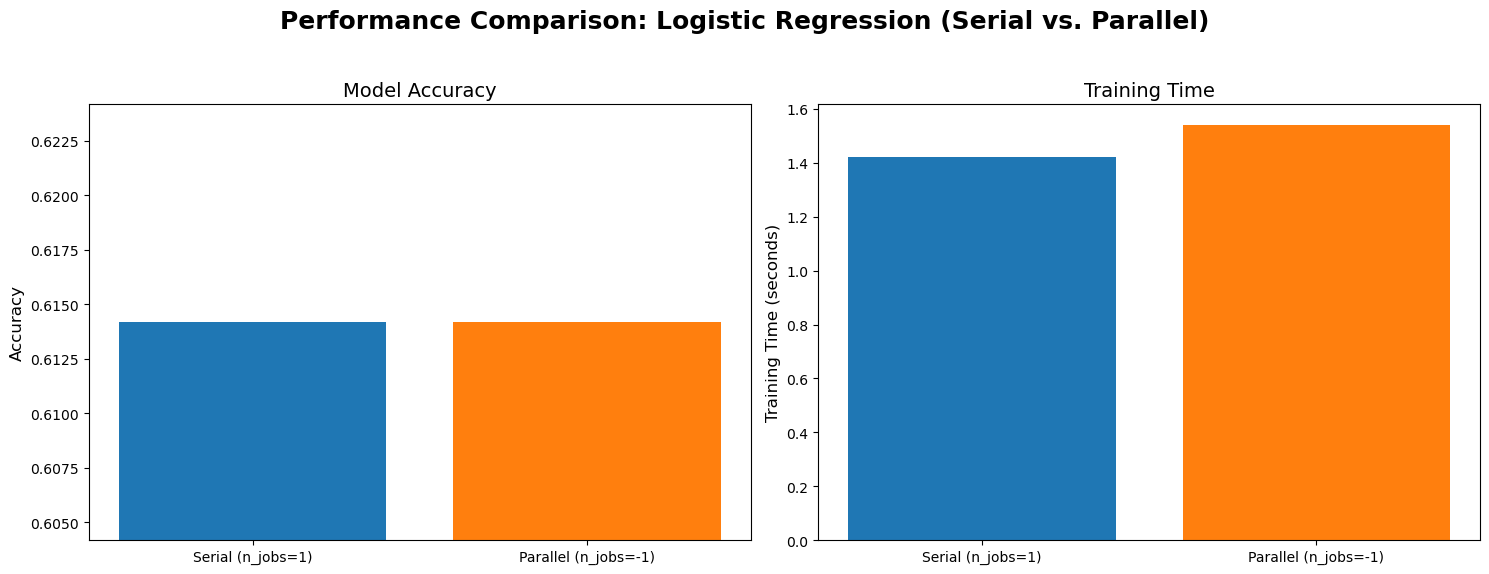

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Labels for each mode
labels = ['Serial (n_jobs=1)', 'Parallel (n_jobs=-1)']

# Accuracy for Logistic Regression Serial and Parallel
accuracy = [
    accuracy_score(y_test, y_pred_serial),
    accuracy_score(y_test, y_pred_parallel)
]

# Training times in seconds
training_time = [
    round(end_serial - start_serial, 2),
    round(end_parallel - start_parallel, 2)
]

# Plotting Accuracy and Training Time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Performance Comparison: Logistic Regression (Serial vs. Parallel)', fontsize=18, weight='bold')

# Accuracy Plot
ax1.bar(labels, accuracy, color=['#1f77b4', '#ff7f0e'])
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.set_title("Model Accuracy", fontsize=14)
ax1.set_ylim([min(accuracy) - 0.01, max(accuracy) + 0.01])

# Training Time Plot
ax2.bar(labels, training_time, color=['#1f77b4', '#ff7f0e'])
ax2.set_ylabel("Training Time (seconds)", fontsize=12)
ax2.set_title("Training Time", fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Optional: Print speedup factor
speedup = training_time[0] / training_time[1] if training_time[1] > 0 else float('inf')


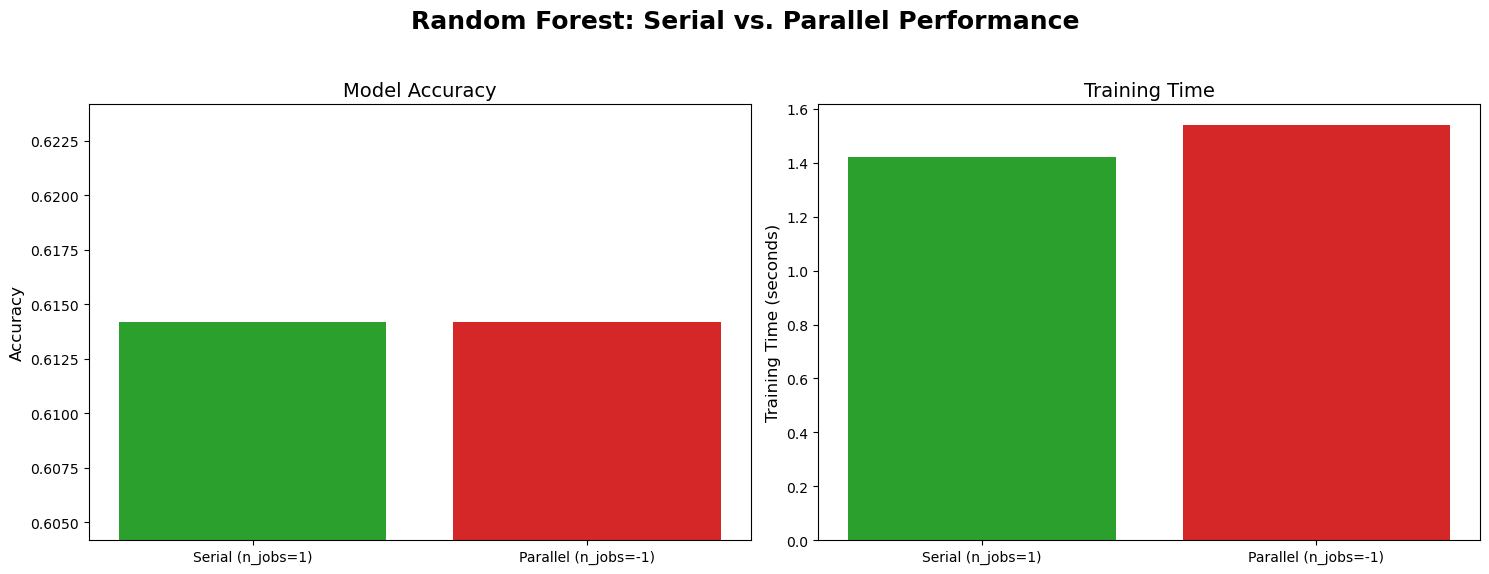

In [58]:
#performance comparision for random 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Labels
labels = ['Serial (n_jobs=1)', 'Parallel (n_jobs=-1)']

# Accuracy values for Random Forest
accuracy = [
    accuracy_score(y_test, y_pred_serial),
    accuracy_score(y_test, y_pred_parallel)
]

# Training times (replace with your actual measurements)
training_time = [
    round(end_serial - start_serial, 2),
    round(end_parallel - start_parallel, 2)
]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Random Forest: Serial vs. Parallel Performance', fontsize=18, weight='bold')

# Accuracy bar chart
ax1.bar(labels, accuracy, color=['#2ca02c', '#d62728'])
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.set_title("Model Accuracy", fontsize=14)
ax1.set_ylim([min(accuracy) - 0.01, max(accuracy) + 0.01])

# Training time bar chart
ax2.bar(labels, training_time, color=['#2ca02c', '#d62728'])
ax2.set_ylabel("Training Time (seconds)", fontsize=12)
ax2.set_title("Training Time", fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print speedup
speedup = training_time[0] / training_time[1] if training_time[1] > 0 else float('inf')

